# Udacity Navigation Project Submission

* This notebook contains the code to run and evaluate an agent which learns using the double DQN algorithm. 


* The following files contain the main body of code:
  * navigation.py          : Contains the train and run functions.
  * src/double_dqn_agent.py: Contains the double DQN algorithm implementation
  * src/model.py           : Contains the neural network implemented using PyTorch.


* In addition, an agent using the  DQN algorithm can be found in
  * src/dqn_agent.py    


* The weights of the trained neural network can be found in
  * model.pt


* The weights of the target neural network can be found in
 * model_target.pt


* Details of setting up the environment can be found in:
  * README.md


* Details of the double DQN algorithm can be found in: 
  * REPORT.md

## Importing the necessary modules

In [1]:
import pdb
import numpy      as np
import navigation as nav
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the unity environment

In [2]:
### Load the unity environment
from unityagents import UnityEnvironment
env    = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Training 

* The agent is trained using the double DQN algorithm
* The maximum number of episodes can be specified using    the `num_episodes`    parameter
* The minimum desired average score can be specified using the `min_performance` parameter
* The number of recent scores used in computing the average can be specified using the `window_size` parameter


In [3]:
### Train the agent
###
num_episodes,  avg_scores, scores = nav.train(  env
                                           , num_episodes = 1800 
                                           , min_performance = 13
                                           , window_size     = 100  )


Number of agents: 1
Number of actions: 4
States have length: 37
Episode: 1 Score:  0.00 average score: 0.00  over episodes: 1
Episode: 51 Score:  20.00 average score: 5.80  over episodes: 51
Episode: 101 Score:  12.00 average score: 9.18  over episodes: 100
Episode: 151 Score:  10.00 average score: 12.19  over episodes: 100
Episode: 201 Score:  14.00 average score: 12.14  over episodes: 100
Episode: 251 Score:  10.00 average score: 12.50  over episodes: 100
Episode: 301 Score:  11.00 average score: 12.61  over episodes: 100
Episode: 351 Score:  9.00 average score: 12.88  over episodes: 100

Environment solved in 355 episodes! 	Average Score: 13.10


## Plotting the Scores and Average Scores

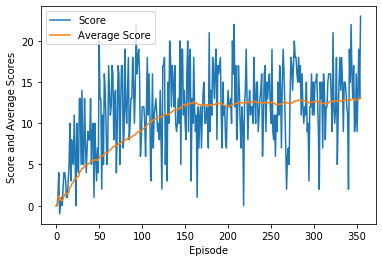

In [6]:
### Plot the reward and the average reward
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(avg_scores)), avg_scores)
plt.ylabel('Score and Average Scores ')
plt.xlabel('Episode')
plt.legend(['Score', 'Average Score'], loc = 'upper left')
plt.savefig('training_performance.png')
plt.show()

## Evaluate the Agent

In [5]:
# Run the trained agent one more time with the saved weights
score = nav.run(env, num_episodes = 1, local_filename = 'model.pt')
print("""The score for the run is: {:d}""".format(int(score[0])))

The score for the run is: 15


## Close the Environment

In [7]:
env.close()